In [4]:
import tensorflow as tf
import os
import sys
import collections

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
a = os.path.join(module_path, "strands_qsr_lib\qsr_lib\src3")

sys.path.append(a)
from rl import action_learner, action_learner_search, value_estimator
from progress_learner import EventProgressEstimator
import config
import project
# Need to add this import to load class
from project import Project
from importlib import reload
from rl import block_movement_env
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import plotting

In [190]:
p = project.Project.load("../slidenext_project.proj")

In [191]:
reload(config)
c = config.Config()
c.no_of_loops = 1
# c.constraint_sigma = 0
reload(block_movement_env)
# reload(value_estimator)
reload(action_learner_search)
tf.reset_default_graph()

global_step = tf.Variable(0, name="global_step", trainable=False)

sess =  tf.Session()

policy_est = action_learner_search.PolicyEstimator(c)

sess.run(tf.global_variables_initializer())

with tf.variable_scope("model") as scope:
    print('-------- Load progress model ---------')
    progress_estimator = EventProgressEstimator(is_training=False, name = p.name, config = c)  

# Print out all variables that would be restored
for variable in tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='model'):
    print (variable.name)

saver = tf.train.Saver(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='model'))
saver.restore(sess, '../progress_SlideNext.mod')

-------- Load progress model ---------
self.inputs.shape = (?, 20, 200)  after linear layer
output.shape = (30, 200) after LSTM
self.output.shape = (30,) after linear
self._targets.shape = (?,) 
model/SlideNext/linear/weight:0
model/SlideNext/linear/bias:0
model/SlideNext/lstm/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/kernel:0
model/SlideNext/lstm/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/bias:0
model/SlideNext/output_linear/weight:0
model/SlideNext/output_linear/bias:0
INFO:tensorflow:Restoring parameters from ../progress_SlideNext.mod


In [195]:
action_ln = action_learner_search.ActionLearner_Search(c, p, progress_estimator, 
                               policy_est, session = sess)

def action_policy(config):
    def boundary_constraint(action):
        for i in range(3):
            if action[i] < config.playground_x[i]:
                return False
            if action[i] > config.playground_x[i] + config.playground_dim[i]:
                return False
        
        return True
    
    def q(state, policy_estimator, no_of_actions = 1, verbose = False, 
       session = None):
        return action_learner_search.random_action_constraint(state, policy_estimator,
                    no_of_actions, verbose, session, boundary_constraint)
    
    return q

explorations = action_ln.learn_one_setup(action_policy(c), verbose = True)

action_level = 0
exploration_index = 0
[(0, 0.76826119422912598), (0, 0.75027310848236084), (0, 0.74917596578598022), (0, 0.72689920663833618), (0, 0.7206040620803833), (0, 0.71505767107009888), (0, 0.69458979368209839), (0, 0.6890486478805542), (0, 0.67178744077682495), (0, 0.66863477230072021), (0, 0.66844385862350464), (0, 0.65624845027923584), (0, 0.63426989316940308), (0, 0.61972594261169434), (0, 0.61813831329345703), (0, 0.61323690414428711), (0, 0.60476517677307129), (0, 0.5784001350402832), (0, 0.573497474193573), (0, 0.56520062685012817)]
action_level = 1
exploration_index = 0
exploration_index = 1
exploration_index = 2
exploration_index = 3
exploration_index = 4
exploration_index = 5
exploration_index = 6
exploration_index = 7
exploration_index = 8
found_completed_act found_completed_act found_completed_act
exploration_index = 9
exploration_index = 10
exploration_index = 11
exploration_index = 12
exploration_index = 13
exploration_index = 14
exploration_index = 15
exploratio

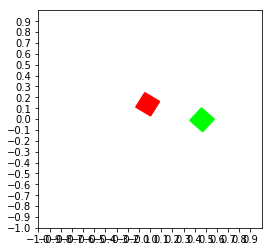

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[ 0.49347676  0.23968848  0.79227157]
[[-0.01892405  0.24485656  0.1079453   0.16483052  0.02791925  0.03796117
  -0.0989501   0.11798721  0.02691209  0.00543193  0.02599507  0.00399627
   0.0245594   0.00491329  0.02547642  0.00634895  0.46068939  0.09925414
   0.57187855 -0.00142839  0.47119603 -0.11261754  0.36000687 -0.01193502
   0.          0.          0.          0.          0.          0.          0.
   0.         -0.47961345  0.14560242 -0.46393326  0.1662589  -0.44327677
   0.15057871 -0.45895697  0.12992223]
 [ 0.00798803  0.2502885   0.13394037  0.16882679  0.05247865  0.04287445
  -0.07347368  0.12433616  0.02691496  0.00541856  0.02598169  0.0039934
   0.02455653  0.00492666  0.0254898   0.00635182  0.46068939  0.09925414
   0.57187855 -0.00142839  0.47119603 -0.11261754  0.36000687 -0.01193502
   0.          0.          0.          0.          0.          0.          0.
   0.         -0.452

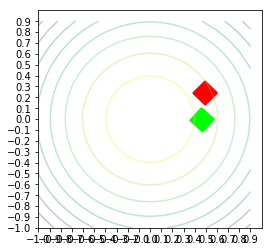

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[ 0.12195243 -0.05130544  0.50714483]
[[ 0.00859117  0.25041007  0.13452277  0.16891631  0.053029    0.04298471
  -0.07290259  0.12447848  0.0511107   0.01027718  0.04932409  0.00758055
   0.04662746  0.00936715  0.04841407  0.01206378  0.46068939  0.09925414
   0.57187855 -0.00142839  0.47119603 -0.11261754  0.36000687 -0.01193502
   0.          0.          0.          0.          0.          0.          0.
   0.         -0.45209822  0.15115593 -0.43735578  0.17034469 -0.41816702
   0.15560226 -0.43290946  0.1364135 ]
 [ 0.05970187  0.26068725  0.18384686  0.17649686  0.09965646  0.05235187
  -0.02448852  0.13654226  0.05111999  0.01022873  0.04927565  0.00757126
   0.04661817  0.0094156   0.04846251  0.01207308  0.46068939  0.09925414
   0.57187855 -0.00142839  0.47119603 -0.11261754  0.36000687 -0.01193502
   0.          0.          0.          0.          0.          0.          0.
   0.         -0.40

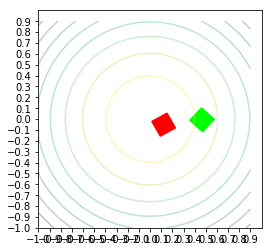

In [196]:
explorations[0].replay(verbose = True)

In [174]:
print (explorations[0].start_config)

for _, from_t, to_t, _, _, success, _, _ in explorations[0].action_storage:
    print (str(from_t) + " " + str(to_t) + " " + str(success) ) 

[Cube : [ 0.55916773 -0.45340549  0.38294344], Cube : [-0.40964779 -0.12172395  1.27858668]]
[ 0.55916773 -0.45340549  0.38294344] [ 0.54158484  0.86653476  0.79448832] True
[ 0.54158484  0.86653476  0.79448832] [-0.49951228 -0.69036695  0.15960644] True
[-0.49951228 -0.69036695  0.15960644] [ 0.41131718 -0.26221855  0.36441135] True
[ 0.41131718 -0.26221855  0.36441135] [ 0.41131718 -0.26221855  0.36441135] True
[ 0.41131718 -0.26221855  0.36441135] [ 0.41131718 -0.26221855  0.36441135] True


In [175]:
reload(block_movement_env)
a = block_movement_env.BlockMovementEnv(c, p.speed, progress_estimator = progress_estimator, session = sess)

In [178]:
a.test_case(a.bad_case_2)

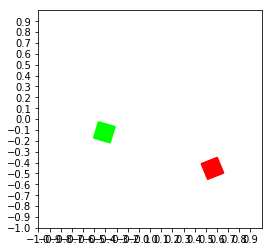

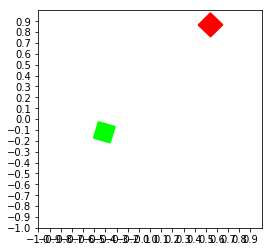

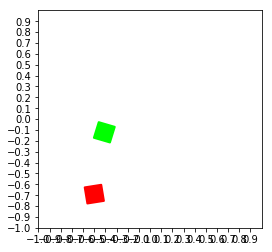

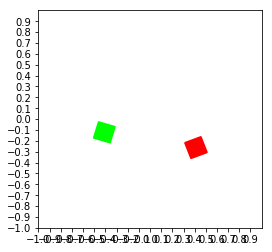

In [180]:
a.replay(verbose = False)

In [182]:
import numpy as np
a = np.zeros((2,3))

In [183]:
np.reshape(a, [-1])

array([ 0.,  0.,  0.,  0.,  0.,  0.])

In [184]:
a

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [185]:
a.shape

(2, 3)

In [186]:
a.shape[1:]

(3,)